Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

Xception is an available model for image classification with weights trained on ImageNet

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from os import listdir, makedirs

In [3]:
start

datetime.datetime(2018, 1, 18, 14, 32, 58, 731636)

In [4]:
!ls

Dog Breed - CNNs models.ipynb test
labels.csv                    train
sample_submission.csv


Using all the images would take lots of time. Let's focus on the most frequent 16 breeds.

In [5]:
INPUT_SIZE = 224
NUM_CLASSES = 16
SEED = 1987
labels = pd.read_csv('labels.csv')
sample_submission = pd.read_csv('sample_submission.csv')
print(len(listdir('train')), len(labels))
print(len(listdir('test')), len(sample_submission))

(10223, 10222)
(10358, 10357)


In [6]:
labels.groupby('breed').count()
# labels dataFrame has almost 120 different dog breed 

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
appenzeller,78
australian_terrier,102
basenji,110
basset,82


In [7]:
selected_breed_list = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(NUM_CLASSES).index)

In [8]:
selected_breed_list
#we took from labels the 16 most frequent dog breed

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'airedale',
 'tibetan_terrier',
 'leonberg',
 'cairn',
 'beagle',
 'japanese_spaniel']

In [9]:
labels = labels[labels['breed'].isin(selected_breed_list)]
#update labels to have data only of the top 16 more frequent breeds

In [10]:
labels['target'] = 1

In [11]:
labels['rank'] = labels.groupby('breed').rank()['id']

In [12]:
labels

,id,breed,target,rank
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,1,1.0
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,1,1.0
12,00693b8bc2470375cc744a6391d397ec,maltese_dog,1,1.0
29,00bee065dcec471f26394855c5c2f3de,cairn,1,1.0
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier,1,1.0
57,0162b3e0144fb1d1ab82fbff3ace9938,shih-tzu,1,1.0
70,01b36cb1b80ab8c3a7d2b7128ad21bdc,samoyed,1,1.0
79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound,1,2.0
80,01ee3c7ff9bcaba9874183135877670e,entlebucher,1,1.0
88,021b5a49189665c0442c19b5b33e8cf1,entlebucher,1,2.0


In [14]:
labels_pivot = labels.pivot('id', 'breed', 'target').reset_index().fillna(0)

In [15]:
labels_pivot

breed,id,afghan_hound,airedale,basenji,beagle,bernese_mountain_dog,cairn,entlebucher,great_pyrenees,japanese_spaniel,leonberg,maltese_dog,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier
0,003df8b8a8b05244b1d920bb6cf451f9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0042188c895a2f14ef64a918ed9c7b64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,00693b8bc2470375cc744a6391d397ec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,00bee065dcec471f26394855c5c2f3de,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,013f8fdf6d638c7bb042f5f17e8a9fdc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0162b3e0144fb1d1ab82fbff3ace9938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,01b36cb1b80ab8c3a7d2b7128ad21bdc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,01e787576c003930f96c966f9c3e1d44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,01ee3c7ff9bcaba9874183135877670e,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,021b5a49189665c0442c19b5b33e8cf1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
np.random.seed(seed=SEED)
rnd = np.random.random(len(labels))
train_idx = rnd < 0.8
valid_idx = rnd >= 0.8
y_train = labels_pivot[selected_breed_list].values
ytr = y_train[train_idx]
yv = y_train[valid_idx]

In [17]:
#pip install keras
from keras.preprocessing import image

def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    img = image.load_img(join(train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img


Using TensorFlow backend.


# Xception for dog breed classification 
##### Model	Size	Top-1 Accuracy	Top-5 Accuracy	Parameters	Depth
##### Xception	88 MB	0.790	0.945	22,910,480	126

In [18]:
#from tqdm import tqdm
from os.path import join
import h5py
from keras.applications import xception

In [19]:
print(len(train_idx))
print(len(yv))
print(len(y_train))
print(len(labels))

1777
368
1777
1777


In [20]:
INPUT_SIZE = 299
POOLING = 'avg'
x_train = np.zeros((len(labels), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32') #1777 images with 299X299X3
for i, img_id in enumerate(labels['id']):
    img = read_img(img_id, 'train', (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_train[i] = x
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

Train Images shape: (1777, 299, 299, 3) size: 476,596,731


In [21]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))
#Xtr is following the same order w.r.t. the 'id' comparing to ytr
#Xv is following the same order w.r.t. the 'id' comparing to yv
#because labels and labels_pivot present the same order w.r.t. the column 'id'

((1409, 299, 299, 3), (368, 299, 299, 3), (1409, 16), (368, 16))


In [22]:
#there is a need to install h5py (pip install h5py) and restart the machine after that
#vgg_bottleneck = VGG16(weights='imagenet', include_top=False, pooling=POOLING)
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)

In [23]:
train_x_bf = xception_bottleneck.predict(Xtr, batch_size=32, verbose=1)
valid_x_bf = xception_bottleneck.predict(Xv, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))

368/368 [==============================] - 355s 966ms/step
Xception train bottleneck features shape: (1409, 2048) size: 2,885,632
Xception valid bottleneck features shape: (368, 2048) size: 753,664


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED)
logreg.fit(train_x_bf, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(valid_x_bf)
valid_preds = logreg.predict(valid_x_bf)
print('Validation Xception LogLoss {}'.format(log_loss(yv, valid_probs)))
print('Validation Xception Accuracy {}'.format(accuracy_score((yv * range(NUM_CLASSES)).sum(axis=1), valid_preds)))

Validation Xception LogLoss 0.0682960004775
Validation Xception Accuracy 0.98097826087


In [52]:
(ytr * range(NUM_CLASSES)).sum(axis=1)

array([  8.,   0.,   1., ...,  10.,   9.,  10.])

In [57]:
b = ytr*range(NUM_CLASSES)
b[2]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

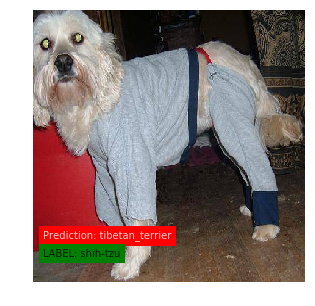

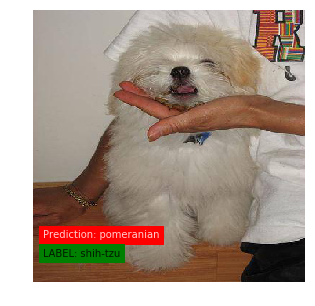

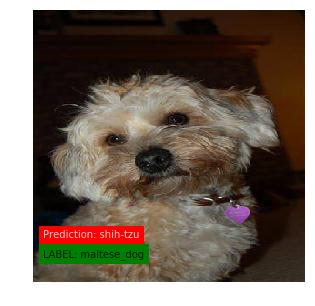

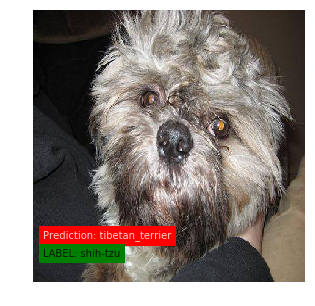

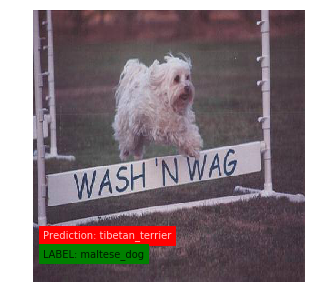

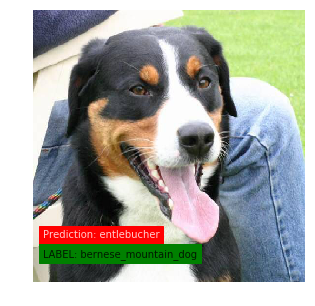

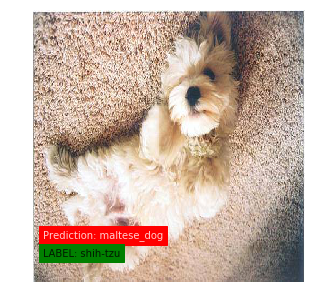

In [59]:
import matplotlib.pyplot as plt
valid_breeds = (yv * range(NUM_CLASSES)).sum(axis=1)
error_idx = (valid_breeds != valid_preds)
for img_id, breed, pred in zip(labels.loc[valid_idx, 'id'].values[error_idx],
                                [selected_breed_list[int(b)] for b in valid_preds[error_idx]],
                                [selected_breed_list[int(b)] for b in valid_breeds[error_idx]]):
    fig, ax = plt.subplots(figsize=(5,5))
    img = read_img(img_id, 'train', (299, 299))
    ax.imshow(img / 255.)
    ax.text(10, 250, 'Prediction: %s' % pred, color='w', backgroundcolor='r', alpha=0.8)
    ax.text(10, 270, 'LABEL: %s' % breed, color='k', backgroundcolor='g', alpha=0.8)
    ax.axis('off')
    plt.show()                                      